# Historical Simulation

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv('dataset.csv', index_col=0)
data.index = pd.to_datetime(data.index)

In [95]:
relative_weights = [0.3, 0.3, 0.01, 0.09, 0.3]
absolute_weights = [300000, 300000, 10000, 90000, 300000]

In [96]:
stock_returns = np.log(data[['SPY', 'AEX', 'RDSA.AS', 'HSI']]).diff()
stock_returns[['SPY', 'HSI']] + np.log(data[['USDEUR', 'HKDEUR']]).diff().values
yields = data['YIELDS'] / 100

In [97]:
# Real losses

losses = np.exp(stock_returns) - 1
until_maturity = pd.Series(np.arange(12, 0, -1/(250))[:len(data)])
until_maturity.index = data.index
losses['bonds'] = np.exp(-until_maturity * yields.diff() + (yields + yields.diff()) / 250) - 1
losses = -losses

In [98]:
total_losses = (losses * relative_weights).sum(axis=1)
total_losses

Date
2010-01-01    0.000000
2010-01-04   -0.000045
2010-01-05   -0.002816
2010-01-06    0.000519
2010-01-07   -0.001156
                ...   
2020-04-20    0.000517
2020-04-21    0.021517
2020-04-22   -0.016037
2020-04-23   -0.002458
2020-04-24    0.004880
Length: 2992, dtype: float64

In [100]:
#total losses last 5 years
middle_index = len(total_losses)//2
total_losses_5 = total_losses[middle_index:]
total_losses_5

Date
2015-03-03    0.006274
2015-03-04    0.000035
2015-03-05   -0.003180
2015-03-06    0.004128
2015-03-09   -0.001211
                ...   
2020-04-20    0.000517
2020-04-21    0.021517
2020-04-22   -0.016037
2020-04-23   -0.002458
2020-04-24    0.004880
Length: 1496, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

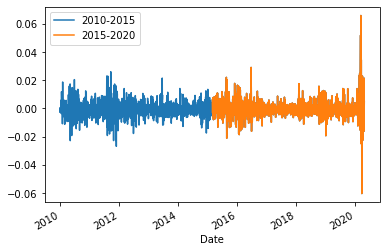

In [120]:
total_losses.plot(label="2010-2015")
total_losses_5.plot(label="2015-2020")
plt.legend()
plt.show

In [102]:
total_losses = total_losses.sort_values(ascending=True)
total_losses

Date
2020-03-24   -0.060337
2011-11-30   -0.026847
2020-03-13   -0.024911
2010-05-09   -0.022845
2011-11-28   -0.022839
                ...   
2016-06-24    0.029071
2020-03-18    0.034418
2020-03-16    0.048485
2020-03-09    0.051869
2020-03-12    0.065860
Length: 2992, dtype: float64

In [121]:
total_losses_5 = total_losses_5.sort_values(ascending=True)
total_losses_5

Date
2020-03-24   -0.060337
2020-03-13   -0.024911
2020-03-17   -0.022602
2020-04-05   -0.022584
2020-03-26   -0.021462
                ...   
2016-06-24    0.029071
2020-03-18    0.034418
2020-03-16    0.048485
2020-03-09    0.051869
2020-03-12    0.065860
Length: 1496, dtype: float64

In [129]:
var_97 = total_losses.quantile(0.025)
var_99 = total_losses.quantile(0.01)

var_97_5 = total_losses_5.quantile(0.025)
var_99_5 = total_losses_5.quantile(0.01)

print("10 Years:\n",
"Var 97.5%:\t", var_97, "\n Var 99%:\t", var_99)
print("5 Years:\n",
"Var 97.5%:\t", var_97_5, "\n Var 99%:\t", var_99_5)

10 Years:
 Var 97.5%:	 -0.010989106928191307 
 Var 99%:	 -0.014467634754846425
5 Years:
 Var 97.5%:	 -0.010950869931641925 
 Var 99%:	 -0.01471920372647147


In [133]:
ES_97 = total_losses[total_losses <= var_97].mean()
ES_99 = total_losses[total_losses <= var_99].mean()

ES_97_5 = total_losses_5[total_losses_5 <= var_97_5].mean()
ES_99_5 = total_losses_5[total_losses_5 <= var_99_5].mean()


print("10 Years:\n",
"ES 97.5%:\t", ES_97, "\n ES 99%:\t", ES_99)
print("5 Years:\n",
"ES 97.5%:\t", ES_97_5, "\n ES 99%:\t", ES_99_5)

10 Years:
 ES 97.5%:	 -0.015550682130929023 
 ES 99%:	 -0.020187176535493723
5 Years:
 ES 97.5%:	 -0.01623384534838028 
 ES 99%:	 -0.02172067281565649


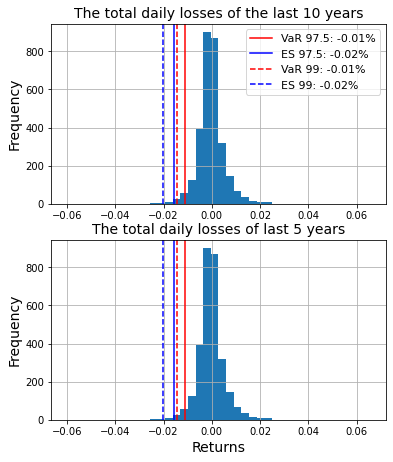

In [171]:
plt.subplot(211)
plt.title("The total daily losses of the last 10 years", fontsize=14)
plt.hist(total_losses, bins=40)
plt.ylabel('Frequency',fontsize=14)
plt.grid(True)
plt.axvline(x=var_97, color="r", linestyle="-", label='VaR 97.5: {0:.2f}%'.format(var_97))
plt.axvline(x=ES_97, color='b', linestyle='-', label='ES 97.5: {0:.2f}%'.format(ES_97))
plt.axvline(x=var_99, color="r", linestyle="--", label='VaR 99: {0:.2f}%'.format(var_99))
plt.axvline(x=ES_99, color='b', linestyle='--', label='ES 99: {0:.2f}%'.format(ES_99))
plt.legend(fontsize=11)

plt.subplot(212)
plt.title("The total daily losses of last 5 years", fontsize=14)
plt.hist(total_losses, bins=40)
plt.xlabel('Returns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.axvline(x=var_97, color="r", linestyle="-", label='VaR 97.5: {0:.2f}%'.format(var_97))
plt.axvline(x=ES_97, color='b', linestyle='-', label='ES 97.5: {0:.2f}%'.format(ES_97))
plt.axvline(x=var_99, color="r", linestyle="--", label='VaR 99: {0:.2f}%'.format(var_99))
plt.axvline(x=ES_99, color='b', linestyle='--', label='ES 99: {0:.2f}%'.format(ES_99))

plt.subplots_adjust(top=1.5)

plt.show()